In [1]:
import os

os.chdir("/DeepenData/Repos/Flux_v0")
import warnings

warnings.filterwarnings("ignore")
import time
from data.mocks import planificacion_simulador

import releases.simv6_1 as sim


dataset = sim.DatasetTTP.desde_csv_atenciones(
    "data/fonasa_monjitas.csv.gz"
)  # IdOficina=2)
un_dia = dataset.un_dia("2023-05-15").sort_values(by="FH_Emi", inplace=False)
skills = sim.obtener_skills(un_dia)
#########################
# ---Ver tiempos de espera históricos---
#########################
#un_dia.T_Esp.hist()

In [2]:
str(un_dia.FH_Emi.astype('datetime64[s]').min().time())

'08:40:11'

In [8]:
start_time = time.time()
hora_cierre = "9:30:00"
# planificacion = sim.plan_desde_skills(skills, inicio="08:00:00", porcentaje_actividad=1)
registros_atenciones, fila = sim.simv06(
    un_dia, hora_cierre, planificacion_simulador)#, log_path="dev/simulacion.log")
print(f"{len(registros_atenciones) = }, {len(fila) = }")
end_time = time.time()
print(f"tiempo total: {end_time - start_time:.1f} segundos")

len(registros_atenciones) = 99, len(fila) = 13
tiempo total: 0.5 segundos


In [9]:
registros_atenciones.head(5)
registros_atenciones.tail(5)


,FH_Emi,FH_AteIni,IdSerie,T_Ate,IdEsc,espera,Priority
270272,2023-05-15 09:20:50,09:29:11,14,660,11,540,NaN
270266,2023-05-15 09:18:20,09:29:11,10,867,4,660,NaN
270274,2023-05-15 09:21:31,09:30:11,5,408,6,540,5
270270,2023-05-15 09:19:53,09:30:11,10,357,5,660,NaN
270369,2023-05-15 09:22:49,09:30:11,10,1280,1,480,NaN


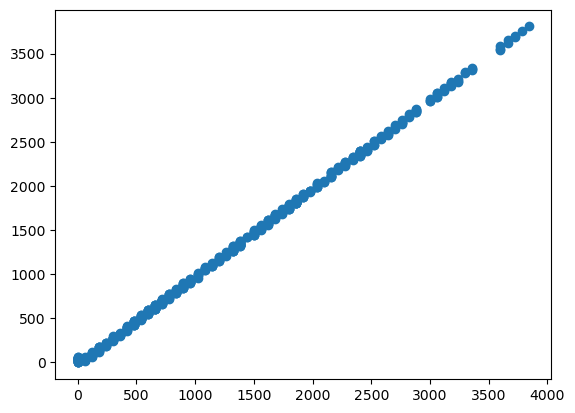

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
muestra_seq = (
    registros_atenciones.head(500)
    .drop("Priority", axis=1, inplace=False)
    .sort_values("FH_AteIni")
    .reset_index(drop=True, inplace=False)
)
first_times = pd.to_datetime(muestra_seq.FH_Emi).dt.time
second_times = pd.to_datetime(muestra_seq.FH_AteIni, format="%H:%M:%S").dt.time
muestra_seq["diff"] = [
    abs(
        pd.to_datetime(f"2000-01-01 {s}") - pd.to_datetime(f"2000-01-01 {f}")
    ).total_seconds()
    for f, s in zip(first_times, second_times)
]
plt.scatter(muestra_seq["espera"], muestra_seq["diff"])

In [11]:

df = pd.read_csv('data/1_999_Ofi_2_2023-05-15(1).tsv', sep='\t').sort_values('FH_AteIni')
muestra_app = (
    df.head(500)
    #.drop("Priority", axis=1, inplace=False)
    .sort_values("FH_AteIni")
    .reset_index(drop=True, inplace=False)
)
first_times = pd.to_datetime(muestra_app.FH_Emi).dt.time
second_times = pd.to_datetime(muestra_app.FH_AteIni).dt.time #, format="%H:%M:%S").dt.time
muestra_app["diff"] = [
    abs(
        pd.to_datetime(f"2000-01-01 {s}") - pd.to_datetime(f"2000-01-01 {f}")
    ).total_seconds()
    for f, s in zip(first_times, second_times)
]
plt.scatter(muestra_app["t_esp"], muestra_seq["espera"])

FileNotFoundError: [Errno 2] No such file or directory: 'data/1_999_Ofi_2_2023-05-15(1).tsv'

In [ ]:
#########################
# ---Ver tiempos de espera vs. % de actividad---
#########################
# import matplotlib.pyplot as plt
# import copy

# planificacion_ = copy.deepcopy(planificacion_simulador)


# for porcentaje in [1, 0.9, 0.75, 0.5]:
#     for k in planificacion_.keys():
#         # Solo hay un bloque horario, por eso el [0]
#         planificacion_[k][0]["propiedades"]["porcentaje_actividad"] = porcentaje

#     registros_atenciones, _ = sim.simv06(un_dia, hora_cierre, planificacion_)

#     (registros_atenciones.espera / 60 / 60).plot(
#         kind="density", alpha=0.7, label=f"{porcentaje*100}%", linewidth=4
#     )
# plt.legend()
# plt.xlim(0, None)
# plt.xlabel("Horas de espera")

In [67]:
import pandas as pd

fecha = "2023-11-27"

str((pd.Timestamp(fecha) - pd.Timedelta(weeks=3 * 4)).date())

'2023-09-04'

In [100]:
atenciones_dia = pd.DataFrame(
    columns=[
        "IdOficina",
        "IdSerie",
        "T_Ate",
        "IdEsc",
        "FH_Llama",
        "FH_AteIni",
        "FH_AteFin",
        "T_Esp",
        "FH_Emi",
    ]
)

for col in ["IdEsc", "FH_Llama", "FH_AteIni", "FH_AteFin", "T_Esp"]:
    atenciones_dia[col] = pd.NA

atenciones_dia = atenciones_dia.astype(
    {
        "IdOficina": "Int32",  #
        "IdSerie": "Int32",  #
        "IdEsc": "object",  # --
        "FH_Emi": "datetime64[s]",  # >
        "FH_Llama": "datetime64[s]",  # --
        "FH_AteIni": "datetime64[s]",  # --
        "FH_AteFin": "datetime64[s]",  # --
        "T_Esp": "Int32",  # --
        "T_Ate": "Int32",  # >
    }
)

atenciones_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype        
---  ------     --------------  -----        
 0   IdOficina  0 non-null      Int32        
 1   IdSerie    0 non-null      Int32        
 2   T_Ate      0 non-null      Int32        
 3   IdEsc      0 non-null      object       
 4   FH_Llama   0 non-null      datetime64[s]
 5   FH_AteIni  0 non-null      datetime64[s]
 6   FH_AteFin  0 non-null      datetime64[s]
 7   T_Esp      0 non-null      Int32        
 8   FH_Emi     0 non-null      datetime64[s]
dtypes: Int32(4), datetime64[s](4), object(1)
memory usage: 132.0+ bytes


In [101]:
casting_dict = {
    "IdOficina": "Int32",  #
    "IdSerie": "Int32",  #
    "IdEsc": "Int32",  # --
    "FH_Emi": "datetime64[s]",  # >
    "FH_Llama": "datetime64[s]",  # --
    "FH_AteIni": "datetime64[s]",  # --
    "FH_AteFin": "datetime64[s]",  # --
    "T_Esp": "Int32",  # --
    "T_Ate": "Int32",  # >
}



[{'IdOficina': 'Int32'},
 {'IdSerie': 'Int32'},
 {'IdEsc': 'Int32'},
 {'FH_Emi': 'datetime64[s]'},
 {'FH_Llama': 'datetime64[s]'},
 {'FH_AteIni': 'datetime64[s]'},
 {'FH_AteFin': 'datetime64[s]'},
 {'T_Esp': 'Int32'},
 {'T_Ate': 'Int32'}]